### Lab work 1

Tensor approximation. Approximate the 2, 3 and 4 index matrices using low-rank decompositions, linear and nonlinear. The data sets are: a picture, a short animation movie (basic variant), a sound spectrogram, an fMRI. Plot the sequence of data approximations with ranks 1,..,n. Plot the error: x-axis is the rank, y-axis is the approximation error. Plot the variance of the error for various samples of data, if possible.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Пара вводных

Для начала разберемся с представлениями тензоров в hottbox на примере изображения в градациях серого $-$ 2D-тензора.

In [4]:
from hottbox.core import Tensor

Image shape:  (1200, 1200)


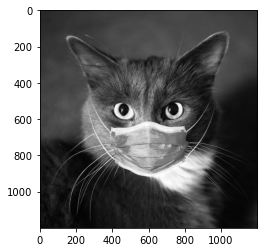

In [5]:
img = cv2.imread('cat.jpg', 0)
print('Image shape: ', img.shape)
plt.imshow(img, cmap='gray')

In [6]:
img_tensor = Tensor(img)
print(img_tensor)

This tensor is of order 2 and consists of 1440000 elements.
Sizes and names of its modes are (1200, 1200) and ['mode-0', 'mode-1'] respectively.


Тензоры в hottbox поддерживают тот же функционал слайсинга, что и в numpy, для примера разложим уже цветное фото кота по цветам RGB

This tensor is of order 3 and consists of 4320000 elements.
Sizes and names of its modes are (1200, 1200, 3) and ['mode-0', 'mode-1', 'mode-2'] respectively.


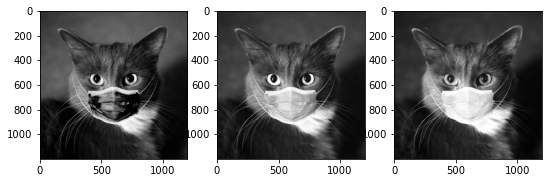

In [7]:
img = cv2.imread('cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_tensor = Tensor(img.astype(np.float))
print(img_tensor)

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.imshow(img_tensor[:,:,0], cmap='gray')

plt.subplot(132)
plt.imshow(img_tensor[:,:,1], cmap='gray')

plt.subplot(133)
plt.imshow(img_tensor[:,:,2], cmap='gray')

In [8]:
from hottbox.core import Tensor
from hottbox.metrics import residual_rel_error
from hottbox.utils.generation import residual_tensor
from hottbox.algorithms.decomposition import TTSVD, HOSVD, HOOI, CPD

### Тензорная декомпозиция: Tucker

![tucker](tucker_decomp.png)

Наиболее часто для представления тензора в таком виде применяется алгоритм HOSVD.

In [9]:
img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA)
img_tensor = Tensor(img.astype(np.float))
print(img_tensor)

This tensor is of order 3 and consists of 30000 elements.
Sizes and names of its modes are (100, 100, 3) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [10]:
hosvd_alg = HOSVD()

Сравним, как будут выглядеть оригинальное изображение и изображение, восстановленное из декомпозиции

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Error:  0.21728999261792123


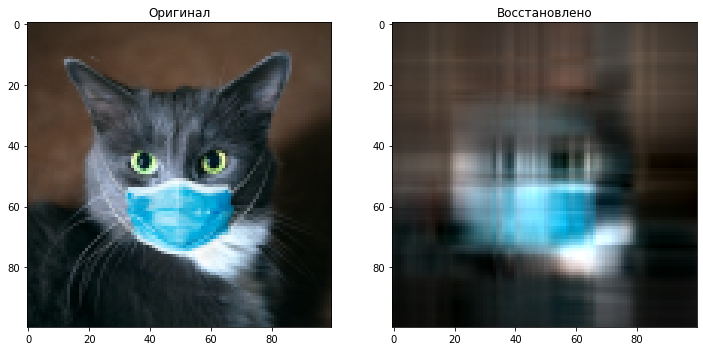

In [11]:
ml_rank = (5, 5, 3)
tensor_tkd_hosvd = hosvd_alg.decompose(img_tensor, ml_rank)
rel_error = residual_rel_error(img_tensor, tensor_tkd_hosvd)
img_reconstructed = tensor_tkd_hosvd.reconstruct()

print('Error: ', rel_error)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Оригинал')
plt.imshow(img)
plt.subplot(122)
plt.title('Восстановлено')
plt.imshow(img_reconstructed.data/255)

Посмотрим как меняется ошибка в зависимости от ранга

In [12]:
errors = []
for rk in range(1, 100):
    ml_rank = (rk, rk, 3)
    tensor_tkd_hosvd = hosvd_alg.decompose(img_tensor, ml_rank)
    rel_error = residual_rel_error(img_tensor, tensor_tkd_hosvd)
    errors.append(rel_error)

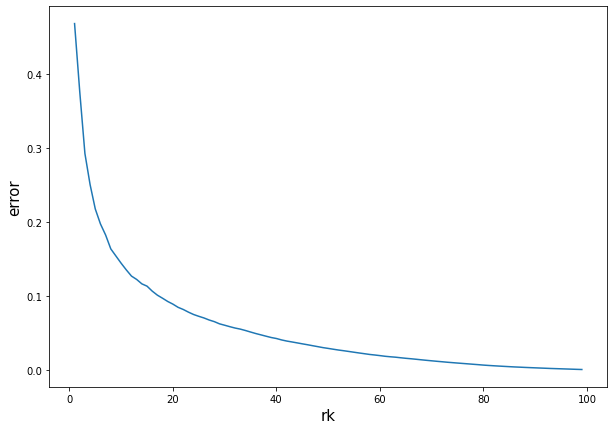

In [13]:
plt.figure(figsize=(10,7))
plt.plot(range(1,100), errors)
plt.xlabel('rk', fontsize=15)
plt.ylabel('error', fontsize=15)
plt.show()

### Тензорная декомпозиция: CPD (PARAFAC / CANDECOMP)

![cpd](cpd_decomp.png)

In [14]:
img = cv2.imread('cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA)

img_tensor = Tensor(img.astype(np.float))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Error:  0.23972011857650455


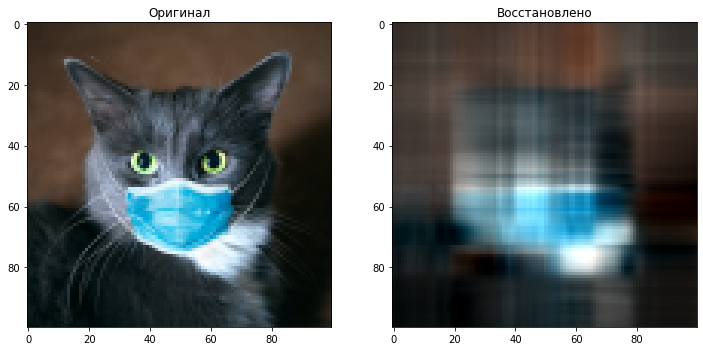

In [15]:
cpd = CPD()
kruskal_rk = (5,)
tensor_cpd = cpd.decompose(img_tensor, rank=kruskal_rk)

rel_error = residual_rel_error(img_tensor, tensor_cpd)
img_reconstructed = tensor_cpd.reconstruct()
print('Error: ', rel_error)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Оригинал')
plt.imshow(img)
plt.subplot(122)
plt.title('Восстановлено')
plt.imshow(img_reconstructed.data/255)

In [16]:
cpd_errors = []
for rk in range(1, 100):
    kruskal_rk = (rk,)
    tensor_cpd = cpd.decompose(img_tensor, kruskal_rk)
    rel_error = residual_rel_error(img_tensor, tensor_cpd)
    cpd_errors.append(rel_error)

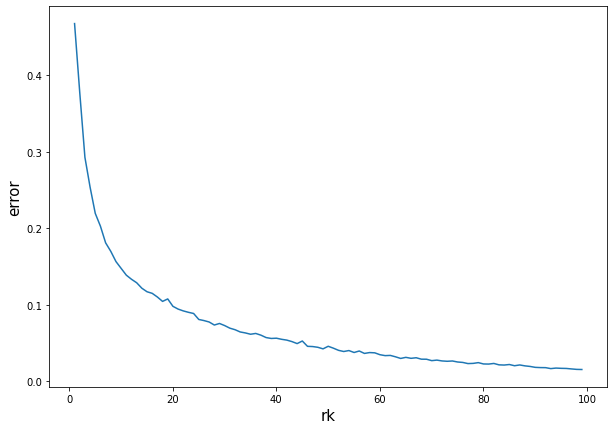

In [17]:
plt.figure(figsize=(10,7))
plt.plot(range(1,100), cpd_errors)
plt.xlabel('rk', fontsize=15)
plt.ylabel('error', fontsize=15)
plt.show()

### Challenge: WHO IS WHO?

Проверяющему предлагается отличить чихуахуа от кекса при восстановлении из декомпозиции разных рангов

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


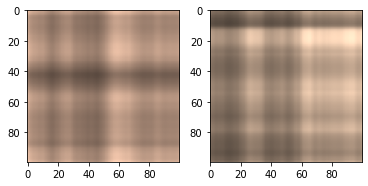

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


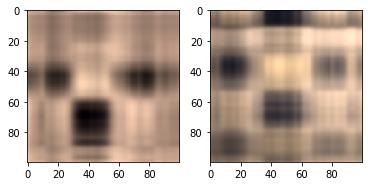

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


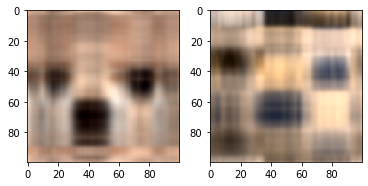

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


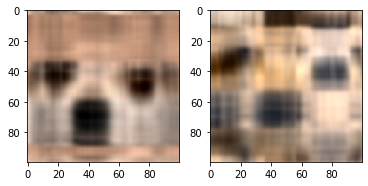

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


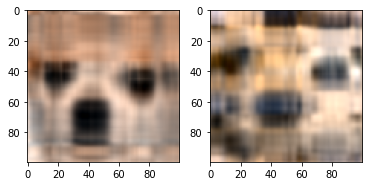

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


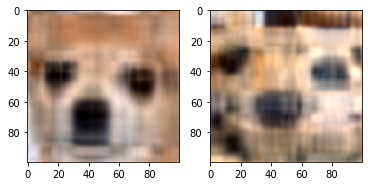

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


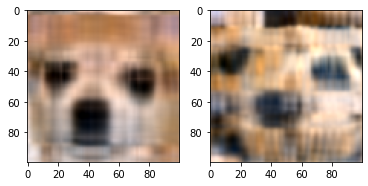

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


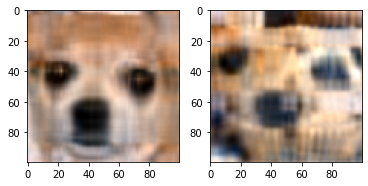

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


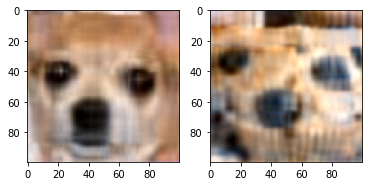

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


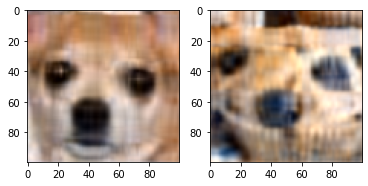

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


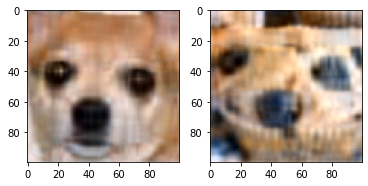

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


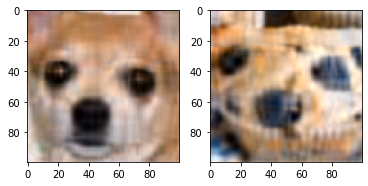

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


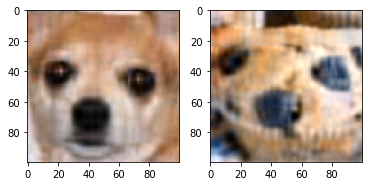

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


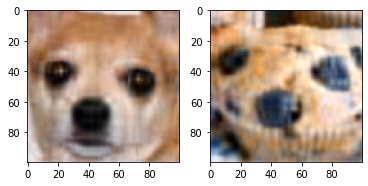

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


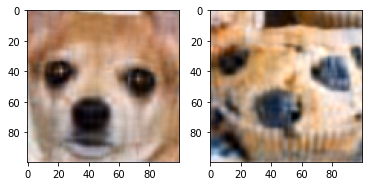

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


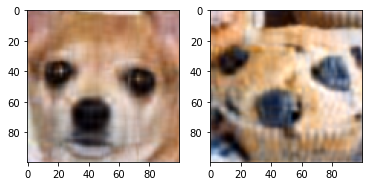

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


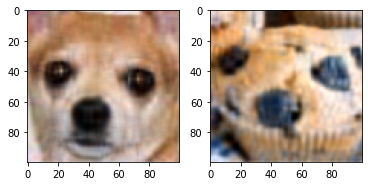

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


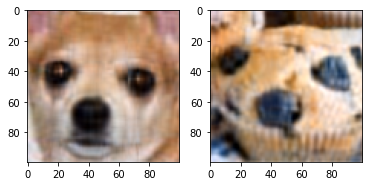

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


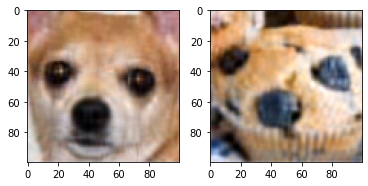

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


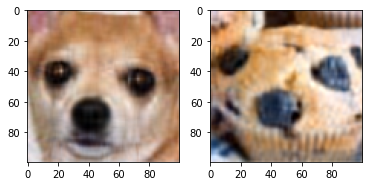

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


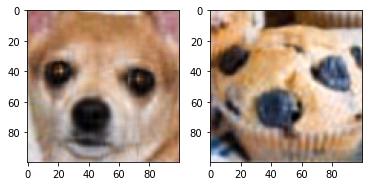

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


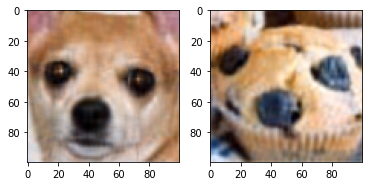

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


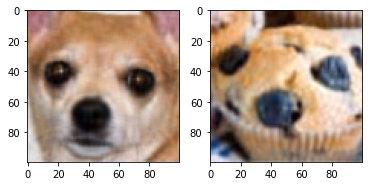

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


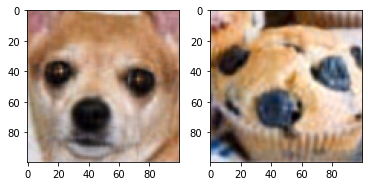

In [199]:
img1 = cv2.imread('pic1.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (100, 100), interpolation = cv2.INTER_AREA)
tensor_img1 = Tensor(img1.astype(np.float))

img2 = cv2.imread('pic2.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (100, 100), interpolation = cv2.INTER_AREA)
tensor_img2 = Tensor(img2.astype(np.float))

for rk in range(1, 25):
    kruskal_rk = (rk,) # увеличивайте пока 
    tensor_cpd1 = cpd.decompose(tensor_img1, rank=kruskal_rk)
    tensor_cpd2 = cpd.decompose(tensor_img2, rank=kruskal_rk)

    reconst1 = tensor_cpd1.reconstruct()
    reconst2 = tensor_cpd2.reconstruct()

    plt.subplot(121)
    plt.imshow(reconst1.data.astype(np.int))
    plt.subplot(122)
    plt.imshow(reconst2.data.astype(np.int))
    plt.show()

### Перейдем к честным временным рядам

Ранее мы рассматривали изображения, которые пусть и являются трехмерными тензорами, но представляют меньший интерес для исследования, поскольку на признаках по одной из размерностей (RGB) не определено отношение порядка. 

Рассмотрим теперь черно-белое видео $-$ суть трехмерный тензор размера $Width \times Height \times Frame$. 

In [18]:
import gif2numpy

In [21]:
from time import sleep

In [45]:
np_frames, extensions, image_specifications = gif2numpy.convert("mickey.gif")

video = []

for frame in np_frames:
    video.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

video = np.array(video)

In [36]:
# np_frames = np.array(np_frames)
print('Tensor shape: ', video.shape)

Tensor shape:  (69, 333, 500)


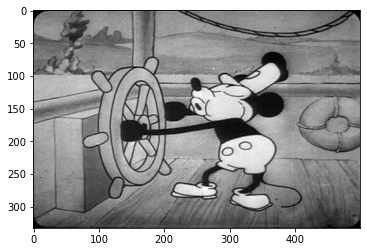

In [39]:
plt.imshow(video[0], cmap='gray')

Проиграем видео целиком

In [40]:
for frame in video:
    cv2.imshow('frame', frame)
    sleep(0.1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

Теперь применим декомпозицию CPD и посчитаем ошибку

In [47]:
video_tensor = Tensor(video.astype(np.float))

In [71]:
cpd = CPD()
kruskal_rk = (10,)
tensor_cpd = cpd.decompose(video_tensor, rank=kruskal_rk)

rel_error = residual_rel_error(video_tensor, tensor_cpd)
video_reconstructed = tensor_cpd.reconstruct()
print('Error: ', rel_error)

Error:  0.24662766270953126


In [72]:
for frame in video_reconstructed:
    cv2.imshow('Reconstructed', frame / 255)
    sleep(0.1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [62]:
cpd_errors = []
for rk in range(1, 500, 50):
    kruskal_rk = (rk,)
    tensor_cpd = cpd.decompose(video_tensor, kruskal_rk)
    rel_error = residual_rel_error(video_tensor, tensor_cpd)
    cpd_errors.append(rel_error)

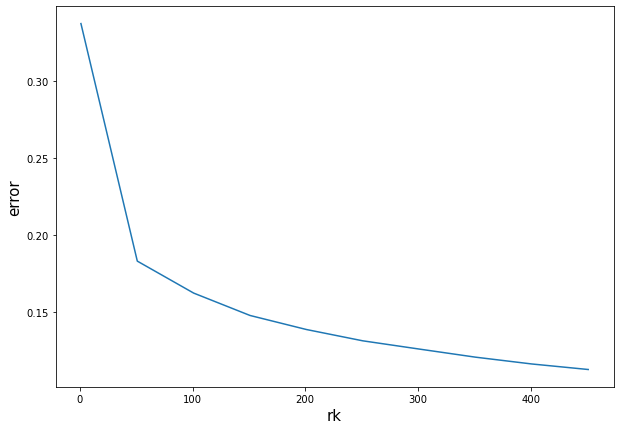

In [63]:
plt.figure(figsize=(10,7))
plt.plot(range(1, 500, 50), cpd_errors)
plt.xlabel('rk', fontsize=15)
plt.ylabel('error', fontsize=15)
plt.show()